In [236]:
import matplotlib.pyplot as plt
import numpy as np

## Generate a symmetric matrix and use it as covariance matrix

In [237]:
def random_covariance_matrix(n):
    A = np.random.rand(n, n)
    for i in range(n):
        # Want to have variance 1.
        A[i, i] = 1
        for j in range(i):
            A[i, j] = A[j, i] 
    return A

In [238]:
n_dims = 10
cov = random_covariance_matrix(n_dims)
cov

array([[1.        , 0.06154377, 0.20068334, 0.03183662, 0.95047332,
        0.69382965, 0.24166106, 0.47595909, 0.26089299, 0.74348413],
       [0.06154377, 1.        , 0.22686814, 0.46704246, 0.48567939,
        0.01209721, 0.32667018, 0.83745685, 0.29698666, 0.16857704],
       [0.20068334, 0.22686814, 1.        , 0.27835638, 0.3318606 ,
        0.64406582, 0.85151453, 0.28745523, 0.86570082, 0.23376007],
       [0.03183662, 0.46704246, 0.27835638, 1.        , 0.23524709,
        0.83037491, 0.03181495, 0.12364383, 0.25882633, 0.06760781],
       [0.95047332, 0.48567939, 0.3318606 , 0.23524709, 1.        ,
        0.91575542, 0.1120372 , 0.69212089, 0.49993313, 0.43626608],
       [0.69382965, 0.01209721, 0.64406582, 0.83037491, 0.91575542,
        1.        , 0.97786315, 0.0534562 , 0.24278414, 0.60512412],
       [0.24166106, 0.32667018, 0.85151453, 0.03181495, 0.1120372 ,
        0.97786315, 1.        , 0.65415524, 0.60385915, 0.80593793],
       [0.47595909, 0.83745685, 0.2874552

/Users/sjosund/.virtualenvs/koe/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


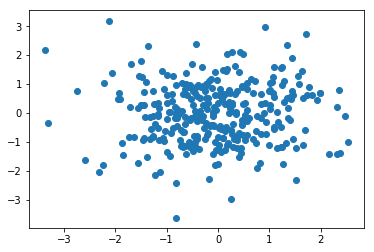

In [239]:
n_examples = 321
X = np.random.multivariate_normal(mean=np.zeros(n_dims), cov=cov, size=n_examples)
plt.scatter(X[:, 0], X[:, 1])

## PCA

In [247]:
class PCA:
    def __init__(self):
        self.eigenvectors = None
        self.eigenvalues = None

    def fit(self, X):
        C = np.dot(X.T, X) / (len(X) - 1)  # Unbiased estimate.
        eig_val, eig_vec = np.linalg.eigh(C)
        sorted_indices = np.argsort(eig_val)[::-1]
        self.eigenvectors = eig_vec[:, sorted_indices]
        self.eigenvalues = eig_val[sorted_indices]
    
    def transform(self, x, n_components):
        projection = np.dot(
            self.eigenvectors[:, :n_components],
            np.dot(self.eigenvectors[:, :n_components].T, x.T)
        ).T
        return projection
    
    def percent_of_variance(self):
        return np.cumsum(self.eigenvalues) / np.sum(self.eigenvalues)

In [248]:
pca = PCA()
pca.fit(X)

In [249]:
X_t = pca.transform(X, n_components=1)

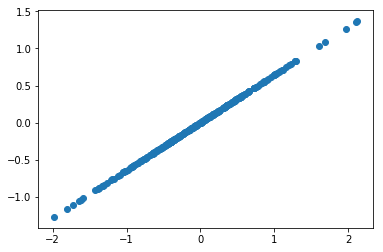

In [250]:
plt.scatter(X_t[:, 0], X_t[:, 1])

### How much of the variance is captured by each principal component?

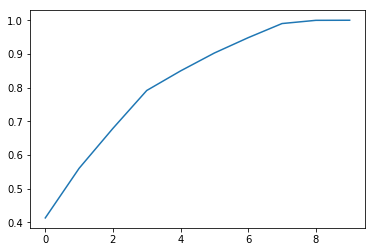

In [251]:
plt.plot(pca.percent_of_variance())